<a href="https://colab.research.google.com/github/SJharbade/DeepLearning/blob/main/02_TensorFlow_NeuralNet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-Class classification using Mnist data sets

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training sample
print(f"Training Sample : \n{train_data[0]}\n")
print(f"Training Lable : \n{ train_labels[0]} \n")

In [ ]:
# Check the shape of single data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

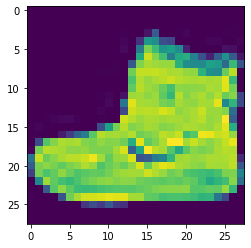

In [ ]:
# plot a single data
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list to index training lables, to make it human readable
class_name = ["T-Shirt/Top","Trousers","Pullover","Dress","Coat","Sanadal","Shirt", "Sneaker","Bag","AnkelBoot"]
len(class_name)

10

Text(0.5, 1.0, 'Bag')

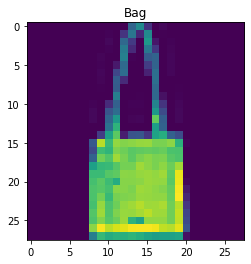

In [ ]:
from inspect import classify_class_attrs
# Plot an Expample Image and it's lable
index_of_choce =200
plt.imshow(train_data[index_of_choce])
plt.title(class_name[train_labels[index_of_choce]])

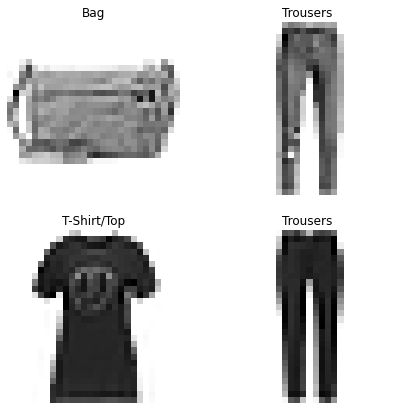

In [ ]:
from numpy import random
# plot multiple random images of faishin minst
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)# to show binary image
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

  ### Use the above code to understand and Visualize large dataseta


# Building Multi- CLass Classification Model
Hyperparameters:
1. Input Layer Shape = 28 X 28 ( the shape of One Image)
2. Hidden Layer/s = Need to run experiments to finalize it
3. Neuron per Hidden Layer = Need to run experiments to finalize it
4. Output layer Shape = 10 ( one per class of clothing)
5. Hidden Activitation = Need to run experiments to finalize it, ReLU mostly
6. Output Activitation= SoftMax
7. Loss Function = tf.keras.losses.CAtegoricalCrossEntropy()
  * If lables are One Hot Encoded - Use Categorical Cross Entropy
  * If lables are integers - Use Sparse CAtegorical Cross Entropy.
8. Optimizer = Need to run experiments to finalize it


In [ ]:
# Input Shape
train_data[0].shape
# Output layer Shape
len(class_name)

10

In [ ]:
# Set Random Seed
tf.random.set_seed(42)
# Create Model
Model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Neural network like data to be in one long vector and hence we have to flatten shape (28,28) to shape(None, 784)
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])
# Complie the Model
Model_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics="accuracy")
# Fit The model
non_norm_history = Model_1.fit(train_data,
                               train_labels,
                               epochs =10,
                               validation_data=(test_data, test_labels))



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [ ]:
Model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of input data
train_data.min(), train_data.max()

(0, 255)

Neural network like data to be scaled, that is the input data should be normalized ie the data will lie in between 0 & 1.

In [ ]:
# We can get our train data and test data between 0 & 1 by dividing it by maximum.
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# get min and max data
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now create the same model with normalized train and test data
tf.random.set_seed(42)
# Create Model
Model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])
# Compile Model
Model_2.compile( loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = "accuracy")
# fit the model
norm_history = Model_2.fit(train_data_norm,
                               train_labels,
                               epochs =10,
                               validation_data = (test_data_norm,test_labels))

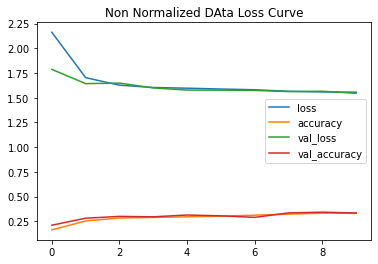

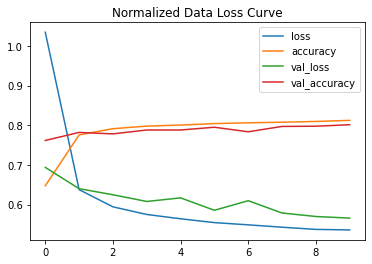

In [ ]:
# It's clear from above results that the Neural network works on Integer data and that too scaled/ normalized data ( between 0 & 1)
# Plotting the Loss curves of non normalized data and normalized data
import pandas as  pd
pd.DataFrame(non_norm_history.history).plot(title = "Non Normalized DAta Loss Curve")
# Plotting for Normalized data
pd.DataFrame(norm_history.history).plot(title = "Normalized Data Loss Curve")

### Finding Ideal Learning Rate


In [ ]:
# Set the random seed
tf.random.set_seed(42)
# Create Model
Model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])
# Compile Model
Model_3.compile( loss= tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = "accuracy")
# Create a Learning Rate Call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-3 * 10 ** (epoch/20))
# Fit the Model
fit_lr_history = Model_3.fit(train_data_norm,
                             train_labels,
                             epochs =40,
                             validation_data = (test_data_norm, test_labels),
                             callbacks= (lr_scheduler))

Text(0.5, 1.0, 'Finding the ideal Learning Rate ')

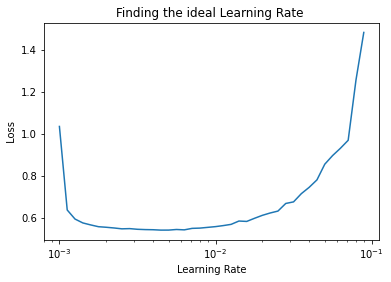

In [ ]:
# plot the learning rate decay curve

lrs = 1e-3 *( 10**(tf.range(40)/20 ))
plt.semilogx(lrs, fit_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel(" Loss ")
plt.title("Finding the ideal Learning Rate ")

Ideal learning rate is derived like lowest point - 10 points, here we can see lowest point is somewhere in between 10**-4 hence ideal learning rate will be 10**-3


In [ ]:
# Ideal Learnng Rate,
10 ** -3
# And it is default learning rate for Adam.

0.001

In [ ]:
from tensorflow.python import train
# Let's re-fit the model with Ideal Learning rate ( Not required though, beut we will increase epochs here)
# Set Random Seed
tf.random.set_seed(42)
# create Model
Model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])
# Compile Model
Model_4.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics ="accuracy")
# Fit the Model
history_4 = Model_4.fit(train_data_norm,
                        train_labels,
                        epochs = 20,
                        validation_data = (test_data_norm, test_labels))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating Multi - Class Classification Model
To evalute our multi calss classification model we could:
* Evaluate performance using other classification metrics like Confusion Matrix
* Assess some of prediction through Visualizations
* Improve it's results by hyperparameter tuning
* Save and Export it for the use of other applications


##Confusion Matrix

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make some predictions with our models
y_probs = Model_4.predict(test_data_norm) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, 2.0516393e-07,
        1.5329231e-02, 2.4532665e-13, 2.4142833e-02, 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657661e-01, 4.3866635e-08, 3.3405751e-03,
        1.3249395e-05, 1.4383214e-21, 8.2790129e-06, 7.3236611e-18,
        5.4811181e-08, 4.9224761e-14],
       [7.5031356e-05, 9.9053681e-01, 4.2528447e-07, 9.2231641e-03,
        1.3623103e-04, 1.8276367e-18, 2.6808189e-05, 4.8124370e-14,
        1.4521520e-06, 2.2211375e-11],
       [7.2189979e-02, 1.5495764e-06, 2.5566906e-01, 1.0363132e-02,
        4.3541368e-02, 1.1069343e-13, 6.1693007e-01, 6.7543116e-23,
        1.3049184e-03, 1.2140288e-09]], dtype=float32)

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_name[y_probs[0].argmax()]

(9, 'AnkelBoot')

In [ ]:
# Convert all of the prediction probablities in integer
y_preds = y_probs.argmax(axis =1)

# View th efirst 10 predictio table
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

let's create a confusion matrix to view them against the truth labels.

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before

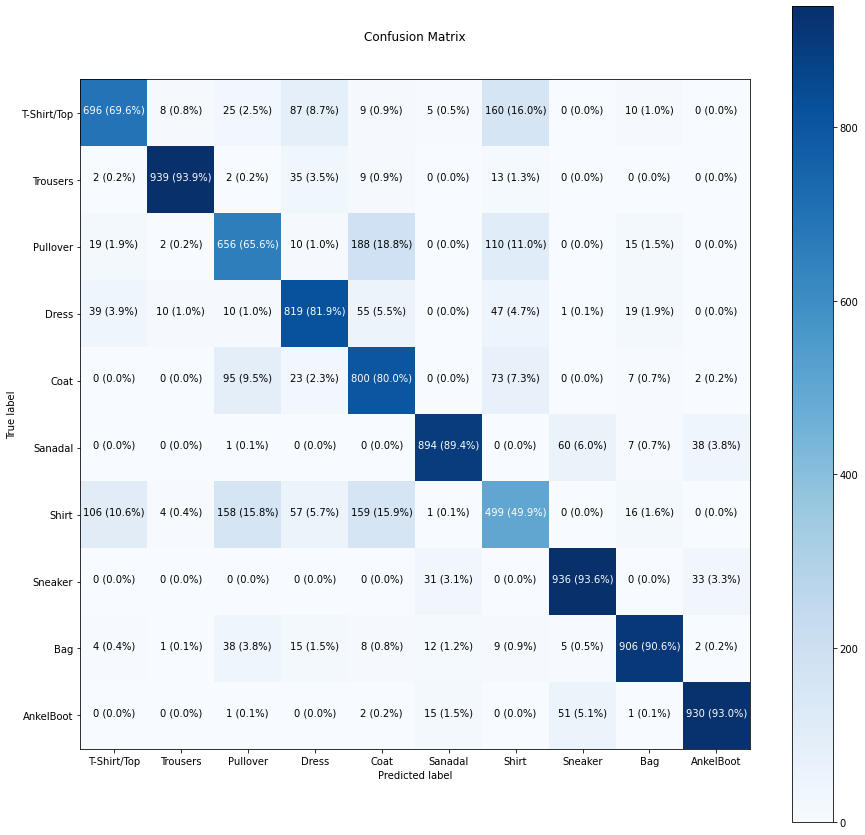

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 17ms/step


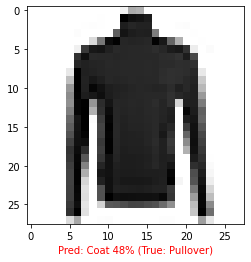

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=Model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_name)